In [1]:
import pandas as pd
import numpy as np
import os
import glob 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Se establecen las rutas de los insumos a trabjar
rutaLocal = os.getcwd().replace("\\","/")
rutafiles = rutaLocal+"/neo-bank-non-sub-churn-prediction/"
rutafiles

'/Users/juandiegofranco/Library/CloudStorage/GoogleDrive-juandiegofrancorivera@gmail.com/Otras computadoras/Mi portátil/Documents/CURSOS PLATAFORMAS/Udemy/Analisis de datos/neo-bank-non-sub-churn-prediction/'

In [3]:
#Se crea una lista con los diferntes DF a consolidar
files = sorted(glob.glob(rutafiles+"train*.parquet"))
files

['/Users/juandiegofranco/Library/CloudStorage/GoogleDrive-juandiegofrancorivera@gmail.com/Otras computadoras/Mi portátil/Documents/CURSOS PLATAFORMAS/Udemy/Analisis de datos/neo-bank-non-sub-churn-prediction/train_2008.parquet',
 '/Users/juandiegofranco/Library/CloudStorage/GoogleDrive-juandiegofrancorivera@gmail.com/Otras computadoras/Mi portátil/Documents/CURSOS PLATAFORMAS/Udemy/Analisis de datos/neo-bank-non-sub-churn-prediction/train_2009.parquet',
 '/Users/juandiegofranco/Library/CloudStorage/GoogleDrive-juandiegofrancorivera@gmail.com/Otras computadoras/Mi portátil/Documents/CURSOS PLATAFORMAS/Udemy/Analisis de datos/neo-bank-non-sub-churn-prediction/train_2010.parquet',
 '/Users/juandiegofranco/Library/CloudStorage/GoogleDrive-juandiegofrancorivera@gmail.com/Otras computadoras/Mi portátil/Documents/CURSOS PLATAFORMAS/Udemy/Analisis de datos/neo-bank-non-sub-churn-prediction/train_2011.parquet',
 '/Users/juandiegofranco/Library/CloudStorage/GoogleDrive-juandiegofrancorivera@

In [4]:
#Se consolidan los diferentes archivos
df = pd.concat((pd.read_parquet(fil) for fil in files)).reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3926058 entries, 0 to 3926057
Data columns (total 30 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   index                     int64         
 1   Id                        int64         
 2   customer_id               int64         
 3   interest_rate             float64       
 4   name                      object        
 5   country                   object        
 6   date_of_birth             object        
 7   address                   object        
 8   date                      datetime64[ns]
 9   atm_transfer_in           int64         
 10  atm_transfer_out          int64         
 11  bank_transfer_in          int64         
 12  bank_transfer_out         int64         
 13  crypto_in                 int64         
 14  crypto_out                int64         
 15  bank_transfer_in_volume   float64       
 16  bank_transfer_out_volume  float64       
 17  crypto_i

In [5]:
#Se crea una muestra del DF para realizarle un analisis 
df_muestra = df.sample(frac=0.15, random_state=1)
df_muestra.info()

<class 'pandas.core.frame.DataFrame'>
Index: 588909 entries, 994961 to 3026397
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   index                     588909 non-null  int64         
 1   Id                        588909 non-null  int64         
 2   customer_id               588909 non-null  int64         
 3   interest_rate             588909 non-null  float64       
 4   name                      588909 non-null  object        
 5   country                   588909 non-null  object        
 6   date_of_birth             588909 non-null  object        
 7   address                   588909 non-null  object        
 8   date                      588909 non-null  datetime64[ns]
 9   atm_transfer_in           588909 non-null  int64         
 10  atm_transfer_out          588909 non-null  int64         
 11  bank_transfer_in          588909 non-null  int64         
 12  b

In [6]:
df_muestra.head(3)

,index,Id,customer_id,interest_rate,name,country,date_of_birth,address,date,atm_transfer_in,...,touchpoints,tenure,from_competitor,job,churn_due_to_fraud,model_predicted_fraud,csat_scores.appointment,csat_scores.email,csat_scores.phone,csat_scores.whatsapp
994961,10842,1287848,2048,0.0,Janet Lee,Sweden,388195200000000000,"830 Cervantes Course Apt. 095\nHallburgh, AL 1...",2015-10-04,0,...,[],2408,False,"Loss adjuster, chartered",False,False,NaN,NaN,NaN,NaN
854218,87087,992660,9447,0.0,Stanley Randall,Slovakia,86572800000000000,"73179 Jordan Dale Suite 769\nJeffreymouth, NV ...",2014-08-16,0,...,[],775,False,Energy engineer,False,False,NaN,NaN,NaN,NaN
870192,103061,869638,10646,0.0,Deborah Hicks,Portugal,874627200000000000,"2362 Carpenter Keys Apt. 456\nEast James, MI 8...",2014-02-05,0,...,"[appointment, email]",413,False,Science writer,False,False,NaN,NaN,NaN,NaN


In [7]:
df_muestra.isna().sum()


index                            0
Id                               0
customer_id                      0
interest_rate                    0
name                             0
country                          0
date_of_birth                    0
address                          0
date                             0
atm_transfer_in                  0
atm_transfer_out                 0
bank_transfer_in                 0
bank_transfer_out                0
crypto_in                        0
crypto_out                       0
bank_transfer_in_volume          0
bank_transfer_out_volume         0
crypto_in_volume                 0
crypto_out_volume                0
complaints                       0
touchpoints                      0
tenure                           0
from_competitor                  0
job                              0
churn_due_to_fraud               0
model_predicted_fraud            0
csat_scores.appointment     586209
csat_scores.email           585260
csat_scores.phone   

In [8]:
#Creamos un DF con la proporcion de nulos de cada variable
var_null = pd.DataFrame(df_muestra.isna().mean().reset_index(name="propor"))
var_null

,index,propor
0,index,0.000000
1,Id,0.000000
2,customer_id,0.000000
3,interest_rate,0.000000
4,name,0.000000
5,country,0.000000
6,date_of_birth,0.000000
7,address,0.000000
8,date,0.000000
9,atm_transfer_in,0.000000


In [9]:
#Definimos las columnas con las variables que tengan menos del 90% de datos nulos
columnas = list(var_null[var_null["propor"]<0.90].iloc[:,0])
columnas


['index',
 'Id',
 'customer_id',
 'interest_rate',
 'name',
 'country',
 'date_of_birth',
 'address',
 'date',
 'atm_transfer_in',
 'atm_transfer_out',
 'bank_transfer_in',
 'bank_transfer_out',
 'crypto_in',
 'crypto_out',
 'bank_transfer_in_volume',
 'bank_transfer_out_volume',
 'crypto_in_volume',
 'crypto_out_volume',
 'complaints',
 'touchpoints',
 'tenure',
 'from_competitor',
 'job',
 'churn_due_to_fraud',
 'model_predicted_fraud']

In [10]:
#  Se redefine el DF de muestra con las columnas filtradas anteriormente
df_muestra = df_muestra[columnas]
df_muestra.isna().sum()

index                       0
Id                          0
customer_id                 0
interest_rate               0
name                        0
country                     0
date_of_birth               0
address                     0
date                        0
atm_transfer_in             0
atm_transfer_out            0
bank_transfer_in            0
bank_transfer_out           0
crypto_in                   0
crypto_out                  0
bank_transfer_in_volume     0
bank_transfer_out_volume    0
crypto_in_volume            0
crypto_out_volume           0
complaints                  0
touchpoints                 0
tenure                      0
from_competitor             0
job                         0
churn_due_to_fraud          0
model_predicted_fraud       0
dtype: int64

In [11]:
#Cantidad de valores por cada registro de la columna
df_muestra.groupby("country").size() 

country
Austria           23127
Belgium           23003
Bulgaria          23415
Czech Republic    23980
Denmark           24260
Estonia           22862
Finland           23445
France            23167
Germany           24163
Greece            23481
Hungary           22705
Ireland           23932
Italy             22861
Latvia            25027
Lithuania         23576
Netherlands       23477
Norway            23621
Poland            23268
Portugal          22866
Romania           23219
Slovakia          22808
Spain             23571
Sweden            24076
Switzerland       24775
USA               24224
dtype: int64

In [12]:
#Cantidad de valores por cada registro de la columna
df_muestra["country"].value_counts().sort_index()

country
Austria           23127
Belgium           23003
Bulgaria          23415
Czech Republic    23980
Denmark           24260
Estonia           22862
Finland           23445
France            23167
Germany           24163
Greece            23481
Hungary           22705
Ireland           23932
Italy             22861
Latvia            25027
Lithuania         23576
Netherlands       23477
Norway            23621
Poland            23268
Portugal          22866
Romania           23219
Slovakia          22808
Spain             23571
Sweden            24076
Switzerland       24775
USA               24224
Name: count, dtype: int64

In [13]:
df_int = df_muestra.select_dtypes(include="int")
#Correlacion de las variables numericas
df_int.corr()

,index,Id,customer_id,atm_transfer_in,atm_transfer_out,bank_transfer_in,bank_transfer_out,crypto_in,crypto_out,complaints,tenure
index,1.000000,0.399557,0.691223,0.015476,0.012406,0.067034,0.040362,-0.002894,-0.001337,0.001122,-0.628890
Id,0.399557,1.000000,0.817761,-0.002107,-0.007178,0.153631,0.199341,0.226728,0.188546,-0.002457,0.151817
customer_id,0.691223,0.817761,1.000000,0.004932,0.001417,0.136708,0.155988,0.156087,0.129185,-0.000711,-0.343320
atm_transfer_in,0.015476,-0.002107,0.004932,1.000000,-0.000282,0.055824,0.040641,0.034050,0.034678,0.004139,-0.013682
atm_transfer_out,0.012406,-0.007178,0.001417,-0.000282,1.000000,0.071714,0.049891,0.039983,0.045684,-0.001643,-0.015581
bank_transfer_in,0.067034,0.153631,0.136708,0.055824,0.071714,1.000000,0.830799,0.829760,0.751992,0.001036,-0.028166
bank_transfer_out,0.040362,0.199341,0.155988,0.040641,0.049891,0.830799,1.000000,0.912209,0.827354,-0.000348,0.007852
crypto_in,-0.002894,0.226728,0.156087,0.034050,0.039983,0.829760,0.912209,1.000000,0.917742,-0.000038,0.051267
crypto_out,-0.001337,0.188546,0.129185,0.034678,0.045684,0.751992,0.827354,0.917742,1.000000,0.000859,0.043686
complaints,0.001122,-0.002457,-0.000711,0.004139,-0.001643,0.001036,-0.000348,-0.000038,0.000859,1.000000,-0.001904


In [14]:
#Revisando el sesgo de las vairbales numericas
df_int.skew()

index                 0.933566
Id                   -0.007443
customer_id           0.978495
atm_transfer_in      77.000773
atm_transfer_out     64.287440
bank_transfer_in      3.839001
bank_transfer_out     2.850359
crypto_in             2.077862
crypto_out            1.969038
complaints           11.376901
tenure                1.795933
dtype: float64

/var/folders/sg/94bycxyj1gjbd5km5gk6zwb00000gn/T/ipykernel_5117/1517105934.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_int.plot(ax=ax,kind="density", layout=(5,6), subplots=True, sharex=False)


<function matplotlib.pyplot.show(close=None, block=None)>

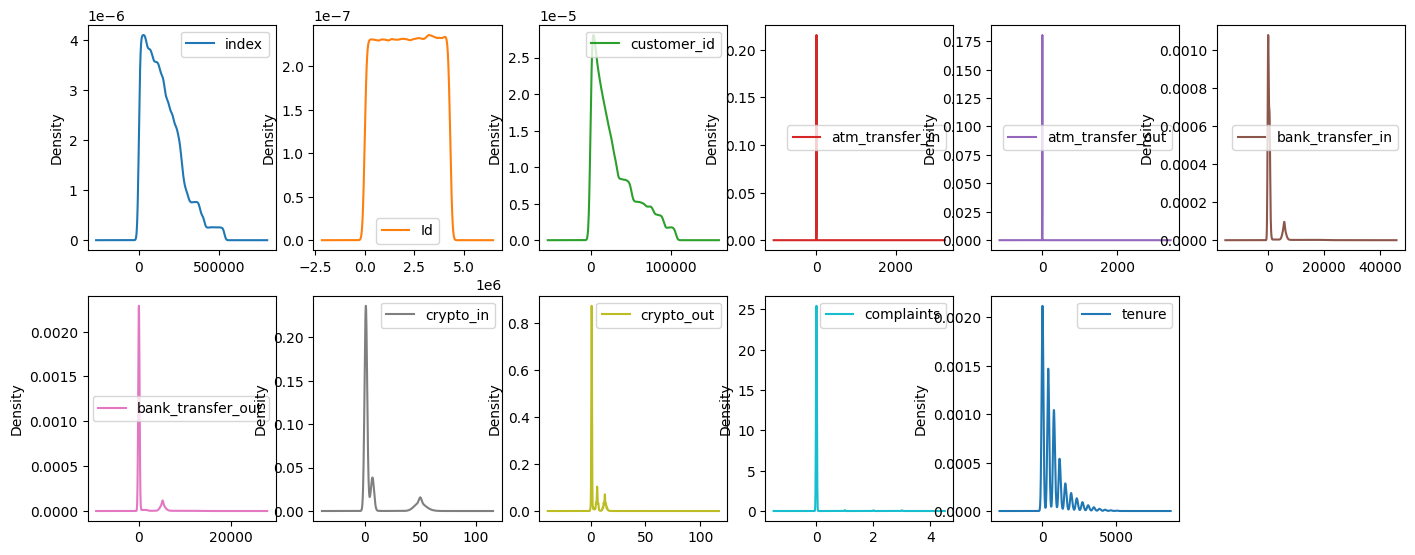

In [15]:
#Se crea grafica de densidad por cada variable numerica
fig = plt.figure(figsize=(17,17))
ax = fig.gca()
df_int.plot(ax=ax,kind="density", layout=(5,6), subplots=True, sharex=False)
plt.show

/var/folders/sg/94bycxyj1gjbd5km5gk6zwb00000gn/T/ipykernel_5117/1912942371.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_int.plot(ax=ax,kind="box", layout=(5,6), subplots=True, sharex=False)


<function matplotlib.pyplot.show(close=None, block=None)>

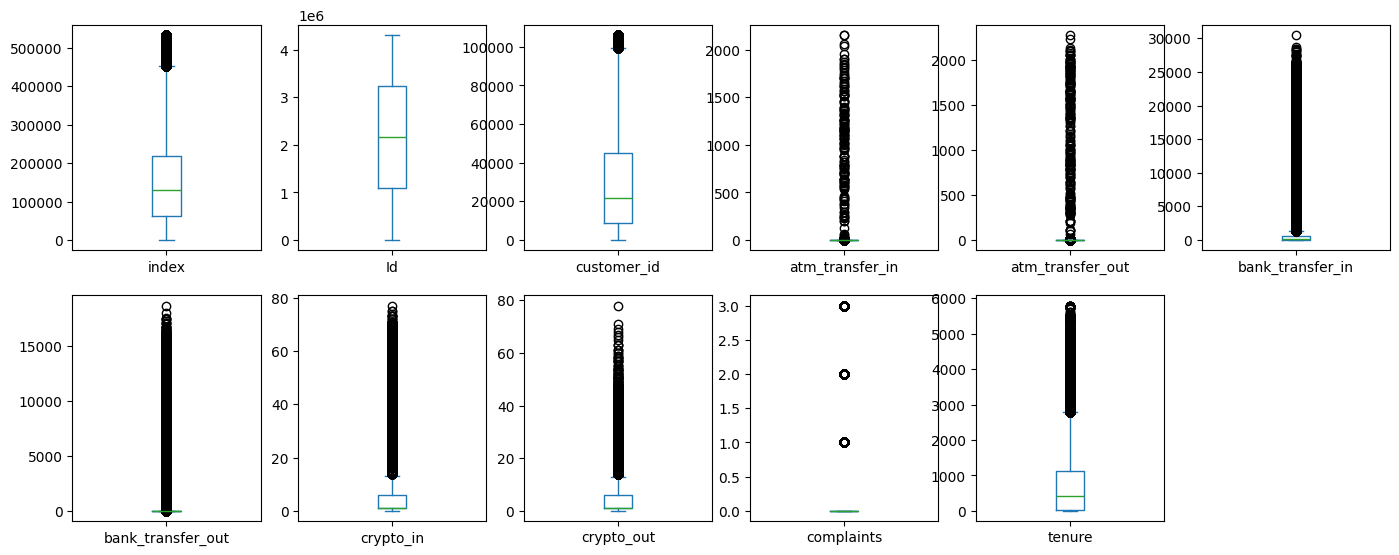

In [16]:
#Se crea grafica de cajas (boxplot) por cada variable numerica
fig = plt.figure(figsize=(17,17))
ax = fig.gca()
df_int.plot(ax=ax,kind="box", layout=(5,6), subplots=True, sharex=False)
plt.show

<Axes: ylabel='bank_transfer_out'>

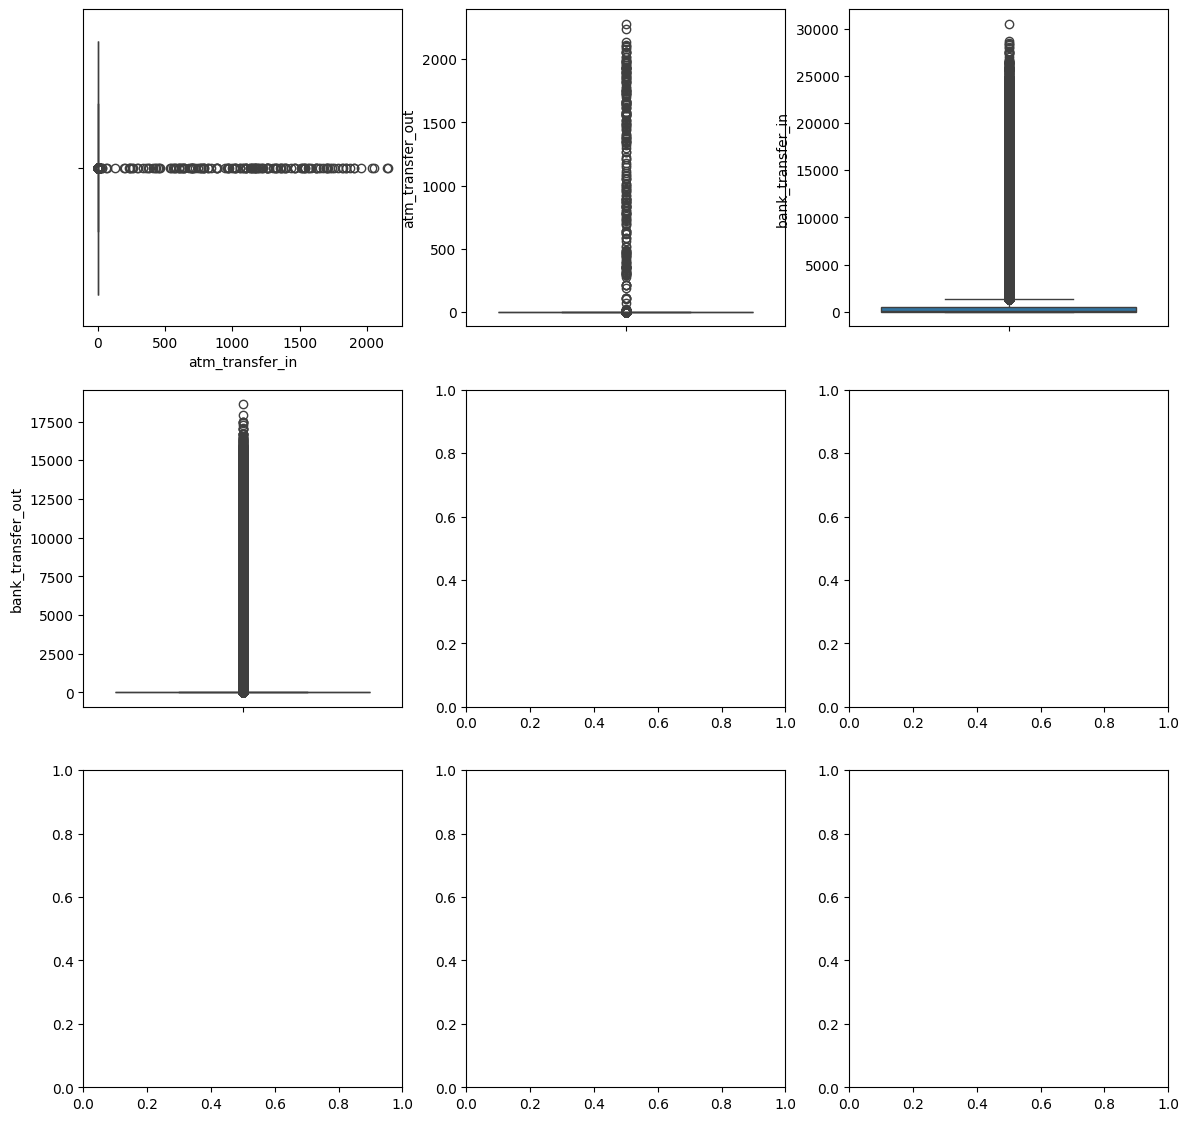

In [17]:
#Grafica de caja con seaborn
f, axes = plt.subplots(3,3, figsize=(14,14))
sns.boxplot(x=df_int["atm_transfer_in"], ax=axes[0,0])
sns.boxplot(df_int["atm_transfer_out"], ax=axes[0,1])
sns.boxplot(df_int["bank_transfer_in"], ax=axes[0,2])
sns.boxplot(df_int["bank_transfer_out"], ax=axes[1,0])

Text(0.5, 1.0, 'Matriz de correlacion')

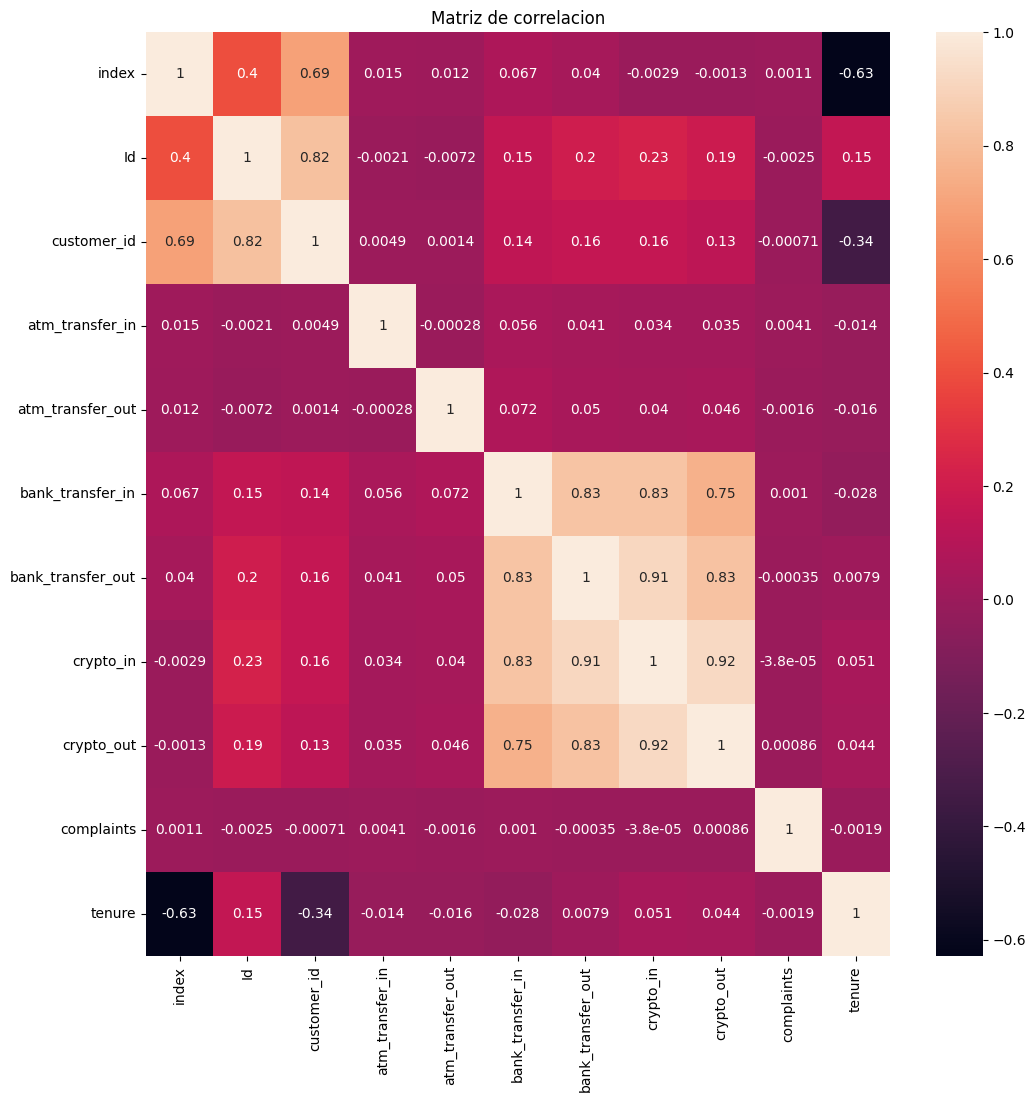

In [18]:
#Grafica de correlacion
corr = df_int.corr() #Se defina la correlacion
fig = plt.figure(figsize=(12,12)) #Se define tamaño de la fig
ax = fig.gca() #Se ptiene el eje actual 
sns.heatmap(corr, annot=True, ax=ax) #Se realiza mapa de calor
plt.title("Matriz de correlacion")

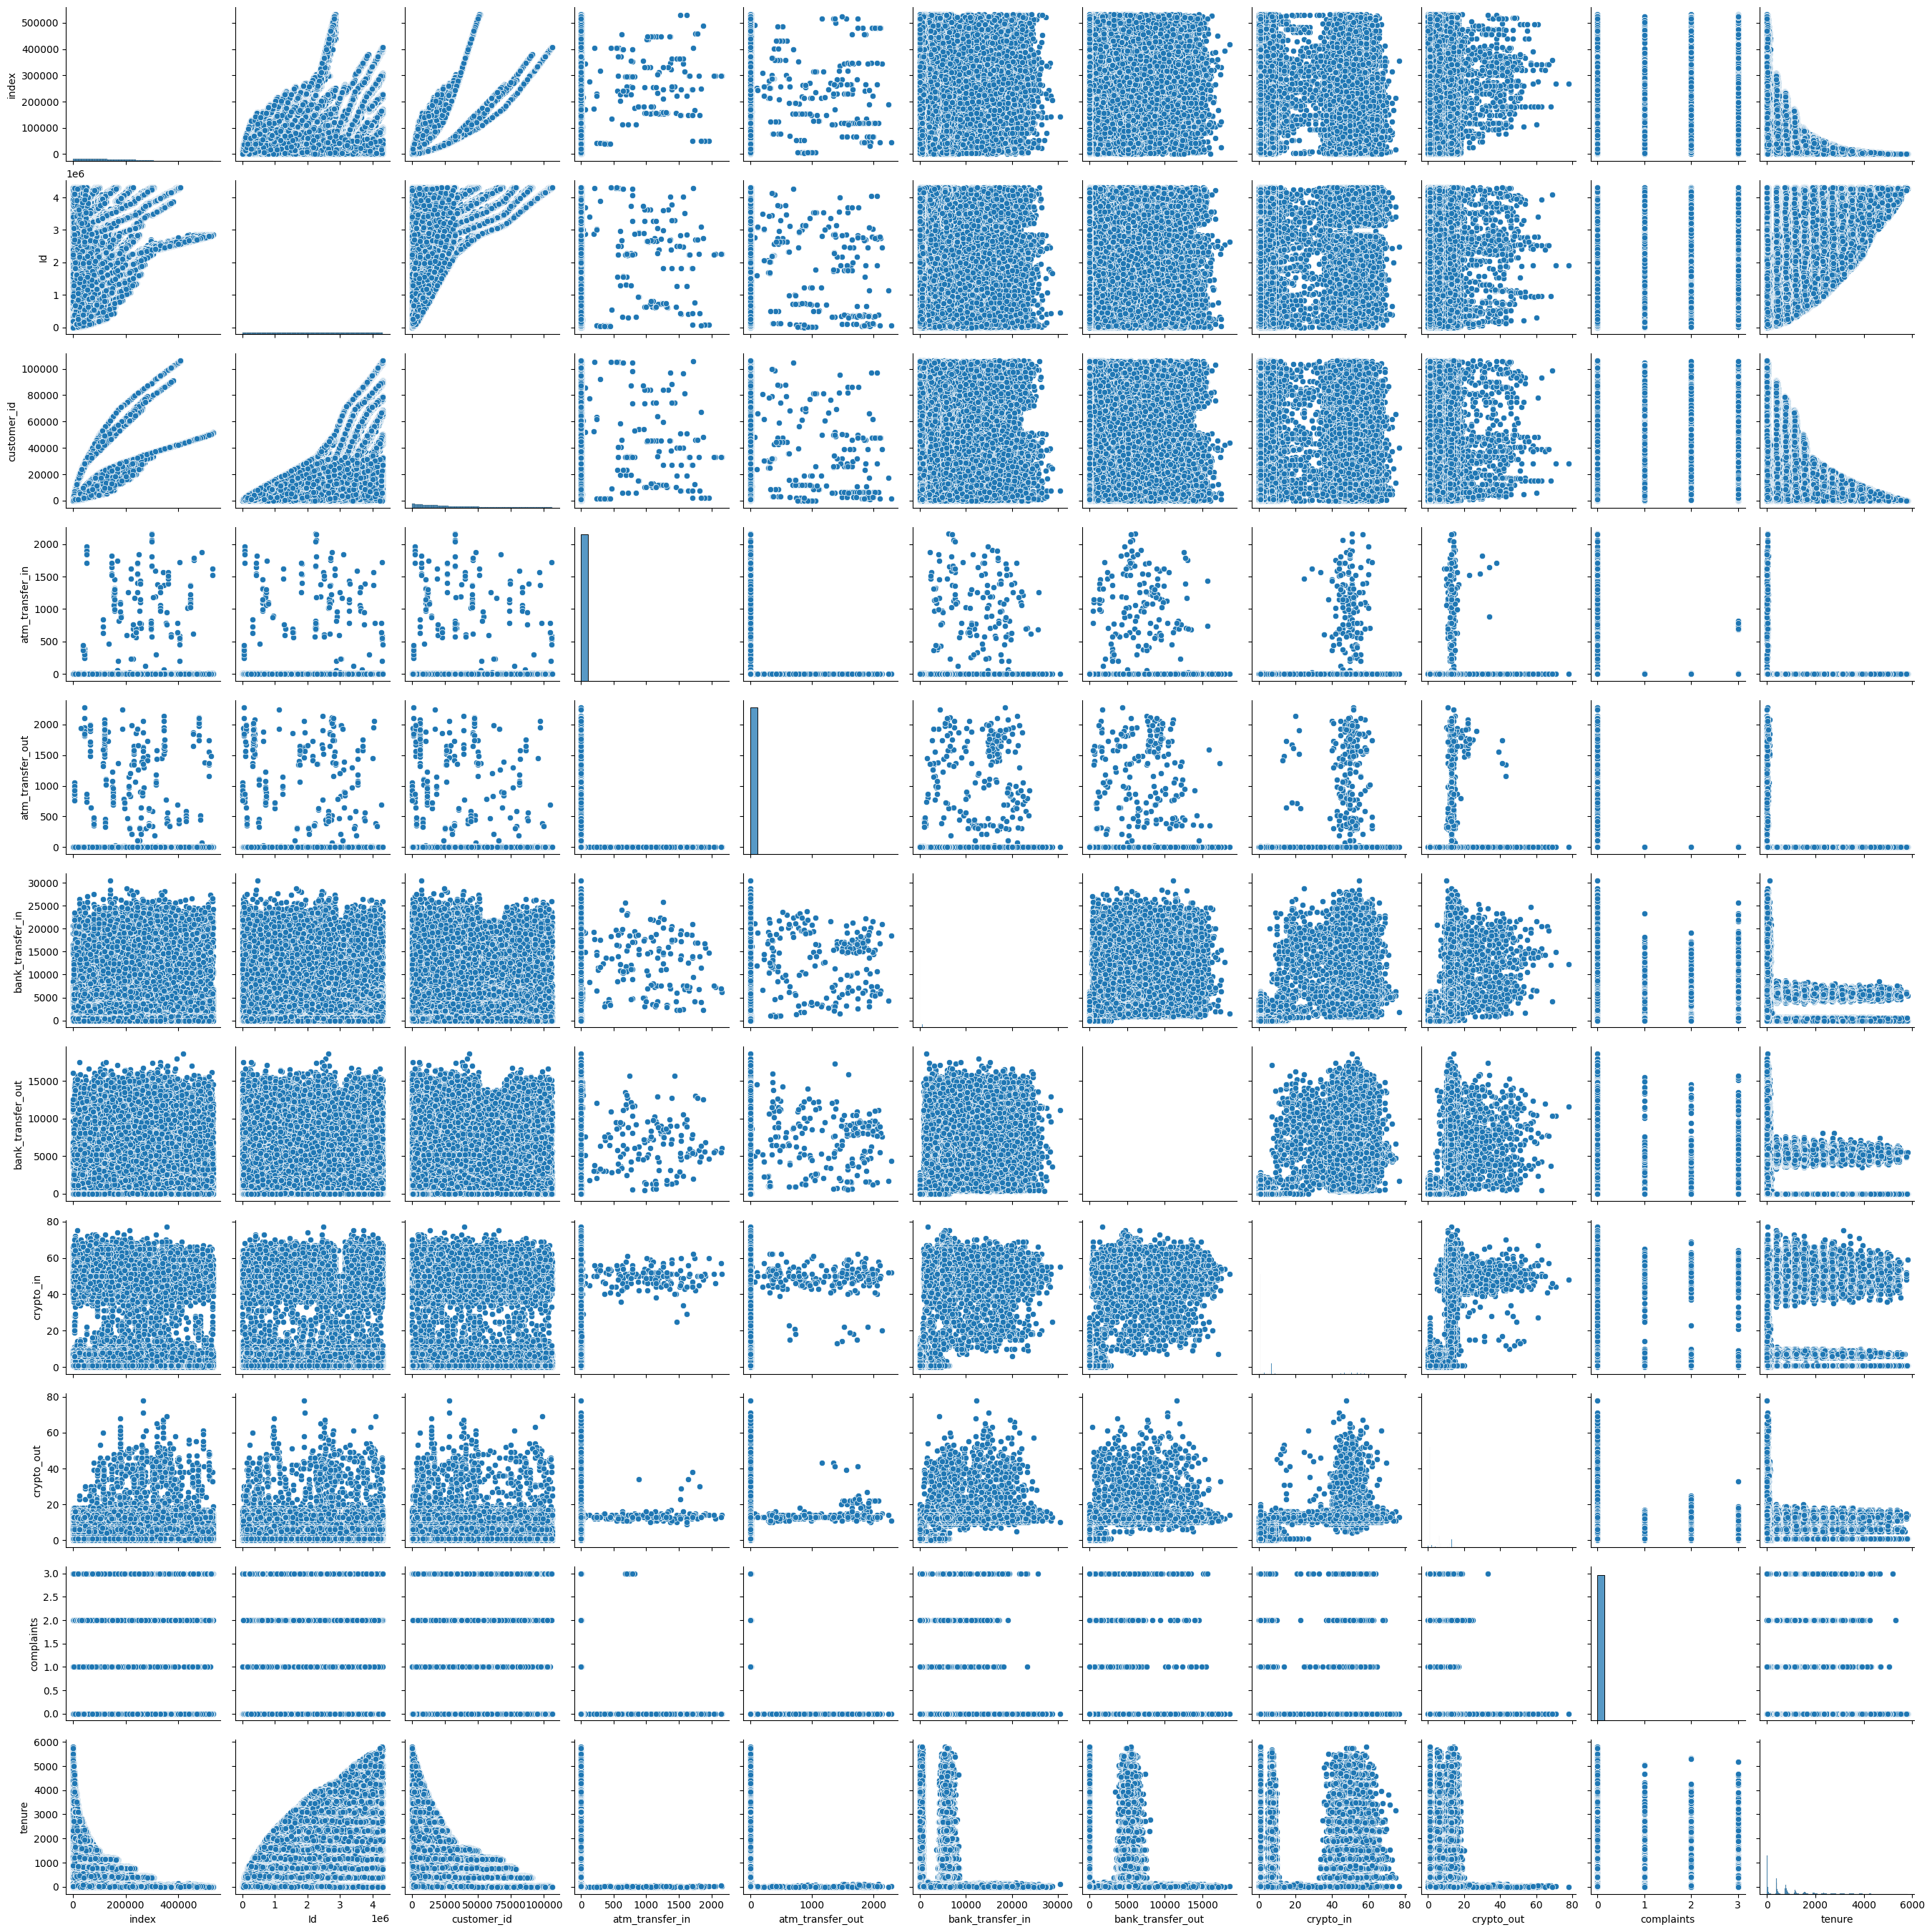

In [19]:

sns.pairplot( data=df_int)

##Procesamiento de variables 

In [20]:
df_int_2 =df_int.iloc[:,-5:]
df_int_2

,bank_transfer_out,crypto_in,crypto_out,complaints,tenure
994961,5,1,1,0,2408
854218,2,1,1,0,775
870192,3,1,1,0,413
1457915,0,6,6,0,19
993908,2,1,1,0,2366
...,...,...,...,...,...
169213,2,1,1,0,386
586075,2,1,1,0,1642
148244,2,1,1,0,851
839903,2,1,1,0,774


In [21]:
#Realizando Estandarizacion de datos con el metodo MinMax
from sklearn.preprocessing import MinMaxScaler
df_int_2 =df_int.iloc[:,-5:]   #Definimos un DF solo con las ultimas 5 columnas
scaler = MinMaxScaler(feature_range=(0,1)) #Llamamos la funcion de estandarizacion
Df_int_ScalerMinMax = scaler.fit_transform(df_int_2) # Estandarizamos los datos
Df_int_ScalerMinMax = pd.DataFrame(Df_int_ScalerMinMax, columns=df_int_2.columns)
Df_int_ScalerMinMax.describe() #Almacenamos en un DF y vemos el estadistico

,bank_transfer_out,crypto_in,crypto_out,complaints,tenure
count,588909.000000,588909.000000,588909.000000,588909.000000,588909.000000
mean,0.043307,0.112930,0.044324,0.007098,0.124917
std,0.111851,0.218627,0.056608,0.073395,0.143964
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000107,0.012987,0.012821,0.000000,0.003970
50%,0.000107,0.012987,0.012821,0.000000,0.072144
75%,0.000376,0.077922,0.076923,0.000000,0.194512
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
#Realizando Estandarizacion de datos con el metodo MinMax
from sklearn.preprocessing import StandardScaler
df_int_2 =df_int.iloc[:,-5:]   #Definimos un DF solo con las ultimas 5 columnas
standard = StandardScaler() #Llamamos la funcion de estandarizacion
Df_int_standard = standard.fit_transform(df_int_2) # Estandarizamos los datos
Df_int_standard = pd.DataFrame(Df_int_standard, columns=df_int_2.columns)
Df_int_standard.describe() #Almacenamos en un DF y vemos el estadistico

,bank_transfer_out,crypto_in,crypto_out,complaints,tenure
count,5.889090e+05,5.889090e+05,5.889090e+05,5.889090e+05,5.889090e+05
mean,-3.692015e-18,-7.918527e-17,-3.815082e-17,-6.183522e-18,-1.605906e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-3.871887e-01,-5.165399e-01,-7.829975e-01,-9.670812e-02,-8.676989e-01
25%,-3.862286e-01,-4.571372e-01,-5.565198e-01,-9.670812e-02,-8.401250e-01
50%,-3.862286e-01,-4.571372e-01,-5.565198e-01,-9.670812e-02,-3.665743e-01
75%,-3.838283e-01,-1.601241e-01,5.758688e-01,-9.670812e-02,4.834192e-01
max,8.553321e+00,4.057462e+00,1.688226e+01,1.352824e+01,6.078511e+00


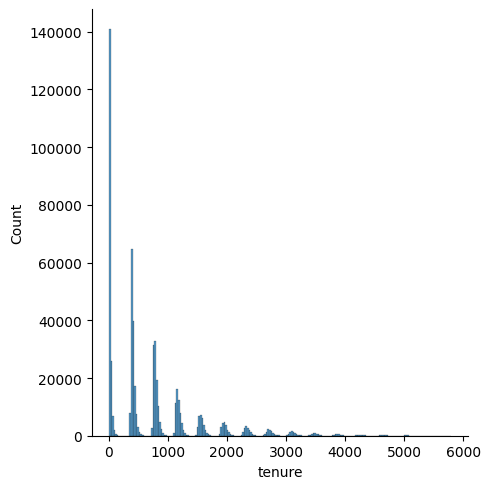

In [23]:
df_int_t = df_int[["tenure"]]
df_int_t = df_int_t[df_int_t["tenure"]>0]
sns.displot(df_int_t, x="tenure")


In [24]:
#Transformacion con Box-Cox
from sklearn.preprocessing import PowerTransformer
#Extraer caracteristica con sesgo 
features = df_int[["tenure"]]
features = features[features["tenure"]>0]
#Se crea objeto de PowerTransforme
pt = PowerTransformer(method="box-cox", standardize=True)
#Se realiza la transformacion de la columnas
features_transforms = pt.fit_transform(features)
#Se almacena el resultado en un DF
features_transforms_df = pd.DataFrame(features_transforms, columns=["tenure"])
print(features_transforms_df) #Se muestra el resultado

          tenure
0       1.446334
1       0.489485
2       0.070756
3      -1.211785
4       1.429163
...          ...
574316  0.029821
574317  1.090316
574318  0.557946
574319  0.488552
574320  0.054323

[574321 rows x 1 columns]


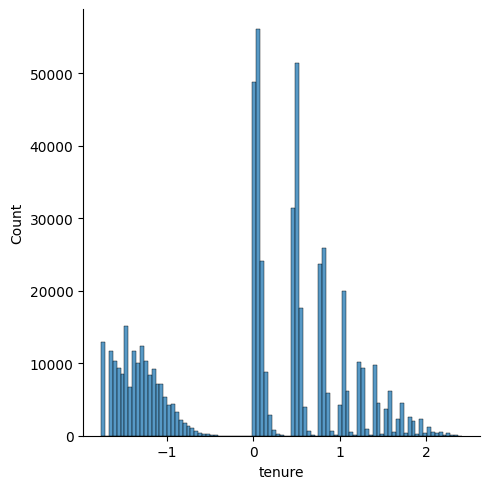

In [27]:
#Grafica de distribucion despues de aplicar Box-Cox
sns.displot(features_transforms_df, x="tenure")

In [33]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# DataFrame simulado
data = pd.DataFrame({
    'cuenta': ['123', '456', '456', '123', '789', '123'],
    'monto': [1000, -500, -500, 1000, 200, -1000],
    'tipo_movimiento': ['D', 'C', 'C', 'D', 'D', 'C'],
    'fecha': ['2023-01-01', '2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02', '2023-01-02']
})

# Preprocesamiento
# Convertir fecha a días desde una fecha base
data['fecha'] = pd.to_datetime(data['fecha'])
data['dias'] = (data['fecha'] - data['fecha'].min()).dt.days

# Codificar tipo de movimiento
data['tipo_movimiento'] = data['tipo_movimiento'].map({'D': 1, 'C': -1})

# Características para clustering
X = data[['monto', 'tipo_movimiento', 'dias']]

# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
data['cluster_dbscan'] = dbscan.fit_predict(X_scaled)

# Validar clústeres (silhouette score para K-Means)
silhouette_kmeans = silhouette_score(X_scaled, data['cluster_kmeans'])
print(f"Silhouette Score K-Means: {silhouette_kmeans}")
print(data)

# Validar cruces en un clúster
for cluster in data['cluster_kmeans'].unique():
    cluster_data = data[data['cluster_kmeans'] == cluster]
    suma_montos = (cluster_data['monto'] * cluster_data['tipo_movimiento']).sum()
    print(f"Cluster {cluster}: Suma de montos (Débito - Crédito) = {suma_montos}")

Silhouette Score K-Means: 0.4236707719126307
  cuenta  monto  tipo_movimiento      fecha  dias  cluster_kmeans  \
0    123   1000                1 2023-01-01     0               2   
1    456   -500               -1 2023-01-01     0               0   
2    456   -500               -1 2023-01-01     0               0   
3    123   1000                1 2023-01-02     1               1   
4    789    200                1 2023-01-02     1               1   
5    123  -1000               -1 2023-01-02     1               0   

   cluster_dbscan  
0              -1  
1               0  
2               0  
3              -1  
4              -1  
5              -1  
Cluster 2: Suma de montos (Débito - Crédito) = 1000
Cluster 0: Suma de montos (Débito - Crédito) = 2000
Cluster 1: Suma de montos (Débito - Crédito) = 1200


In [26]:
#Se importa libreria del modelo y el evaluador
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, random_state=1)
model = LogisticRegression(solver="lbfgs", max_iter=1000)
result = cross_val_score(model, X, Y, cv=kfold) #Se evalua el resultado

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

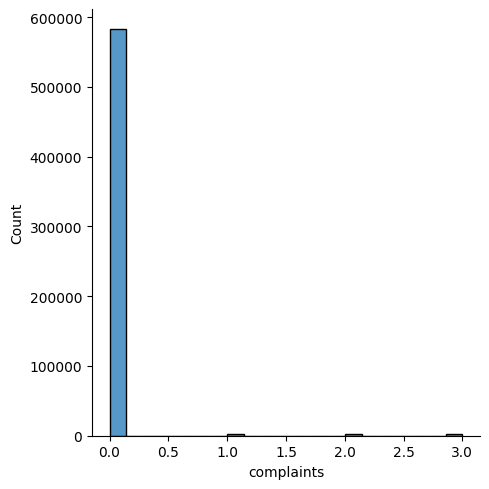

In [ ]:
sns.displot(df_int["complaints"])#.plot(kind="density")

<Axes: xlabel='index'>

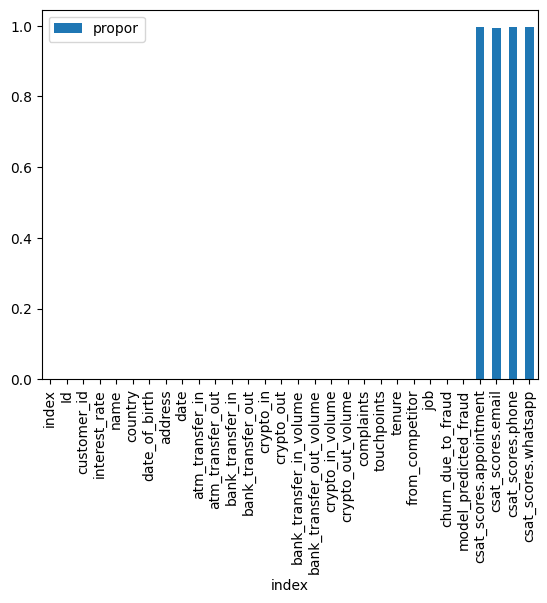

In [ ]:
var_null.plot(x="index", y="propor",kind='bar')

<Axes: ylabel='Density'>

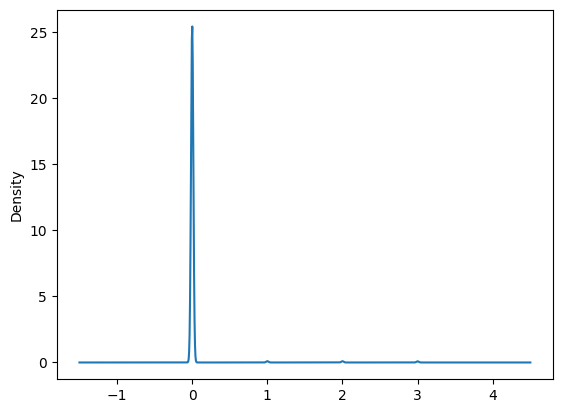

In [ ]:
df_muestra["complaints"].plot(kind='density')

<Axes: xlabel='crypto_in', ylabel='country'>

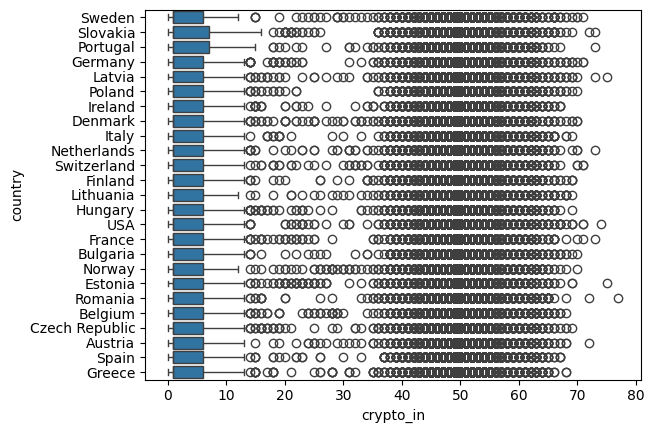

In [ ]:
plt.plot(kind="box", data=df_muestra["country"])
sns.boxplot(data=df_muestra,y="country", x="crypto_in")